In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#用一个文件保存train data

In [6]:
import os
import pandas as pd
from datetime import datetime
# 根文件夹路径
root_folder = "../suzhou/2021"


# 循环读取根文件夹下的所有子文件夹
for sub_folder in os.listdir(root_folder):
    sub_folder_path = os.path.join(root_folder,  sub_folder)  # 获取子文件夹完整路径
    # 循环读取子文件夹下的所有 CSV 文件
    for file_name in os.listdir(sub_folder_path):
        if file_name.endswith(".csv"):   # 确保文件是 CSV 文件
            file_path = os.path.join(sub_folder_path,  file_name)  # 获取文件完整路径
            df = pd.read_csv(file_path)   # 读取 CSV 文件
            # 生成时间戳
            date_str = sub_folder  # 子文件夹名为日期，如 "09-01"
            time_str = file_name.replace(".csv",  "")  # 文件名为时间，如 "00.csv"  -> "00"
            timestamp = datetime.strptime(f"2021-{date_str}  {time_str}:00", "%Y-%m-%d %H:%M")
            # 添加时间戳特征
            df['timestamp'] = timestamp.timestamp()
            df['month'] = timestamp.month   # 月份
            df['day'] = timestamp.day   # 日期
            df['hour'] = timestamp.hour   # 小时
            df['day_of_week'] = timestamp.weekday()   # 星期几（0-6，0 表示星期一）
            # 将结果写入原 CSV 文件
            df.to_csv(file_path,  index=False)

In [7]:

# 根文件夹路径
root_folder = "../suzhou/2022"


# 循环读取根文件夹下的所有子文件夹
for sub_folder in os.listdir(root_folder):
    sub_folder_path = os.path.join(root_folder,  sub_folder)  # 获取子文件夹完整路径
    # 循环读取子文件夹下的所有 CSV 文件
    for file_name in os.listdir(sub_folder_path):
        if file_name.endswith(".csv"):   # 确保文件是 CSV 文件
            file_path = os.path.join(sub_folder_path,  file_name)  # 获取文件完整路径
            df = pd.read_csv(file_path)   # 读取 CSV 文件
            # 生成时间戳
            date_str = sub_folder  # 子文件夹名为日期，如 "09-01"
            time_str = file_name.replace(".csv",  "")  # 文件名为时间，如 "00.csv"  -> "00"
            timestamp = datetime.strptime(f"2022-{date_str}  {time_str}:00", "%Y-%m-%d %H:%M")
            # 添加时间戳特征
            df['timestamp'] = timestamp.timestamp()
            df['month'] = timestamp.month   # 月份
            df['day'] = timestamp.day   # 日期
            df['hour'] = timestamp.hour   # 小时
            df['day_of_week'] = timestamp.weekday()   # 星期几（0-6，0 表示星期一）
            # 将结果写入原 CSV 文件
            df.to_csv(file_path,  index=False)

In [9]:
file_path = "../suzhou/2021/09-02/00.csv"
#打印所有列名
df = pd.read_csv(file_path)
print(df.columns)

Index(['DeviceID', 'Quantity', 'ID', 'KIND', 'WIDTH', 'DIRECTION', 'FUNCCLASS',
       'LENGTH', 'SPEEDCLASS', 'PHYLANES2E', 'PHYLANEE2S', 'geometry',
       'device_id', 'month', 'day', 'hour', 'day_of_week', 'timestamp'],
      dtype='object')


In [10]:
#将所有文件合并到一起
train_data_list = []
selected_columns = ['KIND', 'WIDTH','DIRECTION', 'FUNCCLASS',
       'LENGTH', 'SPEEDCLASS', 'PHYLANES2E', 'PHYLANEE2S','month', 'day', 'hour', 'day_of_week','Quantity']

# 定义两个根文件夹路径
root_folders = ["../suzhou/2021", "../suzhou/2022"]
# 循环读取根文件夹下的所有子文件夹
# 循环读取每个根文件夹
for root_folder in root_folders:
    # 循环读取根文件夹下的所有子文件夹
    for sub_folder in os.listdir(root_folder):
        sub_folder_path = os.path.join(root_folder,  sub_folder)  # 获取子文件夹完整路径

        # 循环读取子文件夹下的所有 CSV 文件
        for file_name in os.listdir(sub_folder_path):
            if file_name.endswith(".csv"):   # 确保文件是 CSV 文件
                file_path = os.path.join(sub_folder_path,  file_name)  # 获取文件完整路径
                df = pd.read_csv(file_path)   # 读取 CSV 文件
                # 仅选择需要的列
                df_selected = df[selected_columns]
                train_data_list.append(df_selected)   # 将数据添加到列表中

# 将所有数据合并为一个 DataFrame
combined_df = pd.concat(train_data_list,  ignore_index=True)

# 将合并后的数据写入到一个 CSV 文件
combined_df.to_csv("../suzhou/data/train_data.csv",  index=False)

In [11]:
import pandas as pd
#读取train_data.csv
train_data = pd.read_csv("../suzhou/data/train_data.csv")
#删除有空值的行
train_data = train_data.dropna()
#train_data.fillna(train_data.mean(),  inplace=True)

print(train_data.shape)
print(train_data.columns)

(2917358, 13)
Index(['KIND', 'WIDTH', 'DIRECTION', 'FUNCCLASS', 'LENGTH', 'SPEEDCLASS',
       'PHYLANES2E', 'PHYLANEE2S', 'month', 'day', 'hour', 'day_of_week',
       'Quantity'],
      dtype='object')


In [12]:
#查看每一列的数据类型
print(train_data.dtypes)
#查看KIND列有几个不同值
print(train_data['KIND'].nunique())

KIND            object
WIDTH          float64
DIRECTION      float64
FUNCCLASS      float64
LENGTH         float64
SPEEDCLASS     float64
PHYLANES2E     float64
PHYLANEE2S     float64
month            int64
day              int64
hour             int64
day_of_week      int64
Quantity         int64
dtype: object
48


In [13]:
# 目标编码 将每个类别替换为其对应的目标变量（Quantity）的均值。
kind_target = train_data.groupby('KIND')['Quantity'].mean()
train_data['KIND'] = train_data['KIND'].map(kind_target)

Iteration 50/100,  Train Loss: 42587.6714,  Validation Loss: 43299.4346

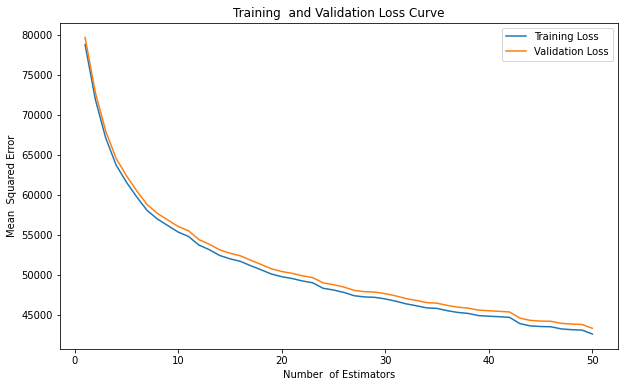

Mean Squared Error: 43299.43460649038
R^2 Score: 0.5139952920169604


In [21]:
import pandas as pd
from sklearn.model_selection  import train_test_split, GridSearchCV
from sklearn.ensemble  import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics  import mean_squared_error, r2_score
from sklearn.preprocessing  import StandardScaler
import matplotlib.pyplot  as plt

# 特征和目标变量
X = train_data[['KIND','WIDTH', 'DIRECTION', 'FUNCCLASS', 'LENGTH', 'SPEEDCLASS','month','hour']]
y = train_data['Quantity']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

model = GradientBoostingRegressor(
    n_estimators=100,  # 树的数量
    learning_rate=0.2,  # 学习率
    max_depth=5,  # 树的深度
    random_state=42
)

# 3.2 训练模型并记录训练过程
train_loss = []
test_loss = []
for i in range(1, 51):  # 迭代 100 次
    model.set_params(n_estimators=i)
    model.fit(X_train,  y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_loss.append(mean_squared_error(y_train,  y_train_pred))
    test_loss.append(mean_squared_error(y_test,  y_test_pred))
    #可视化训练过程进度条
    print(f"\rIteration {i}/50,  Train Loss: {train_loss[-1]:.4f},  Validation Loss: {test_loss[-1]:.4f}",  end='')

# 4. 可视化训练过程
plt.figure(figsize=(10,  6))
plt.plot(range(1,  51), train_loss, label='Training Loss')
plt.plot(range(1,  51), test_loss, label='Validation Loss')
plt.xlabel('Number  of Estimators')
plt.ylabel('Mean  Squared Error')
plt.title('Training  and Validation Loss Curve')
plt.legend()
plt.show()

# 5. 模型评估
# 5.1 预测
y_pred = model.predict(X_test)

# 5.2 计算评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


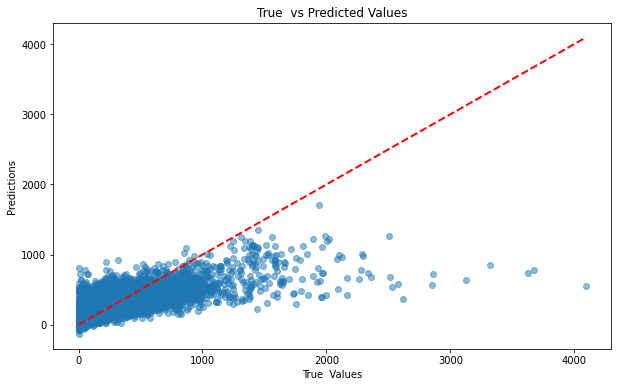

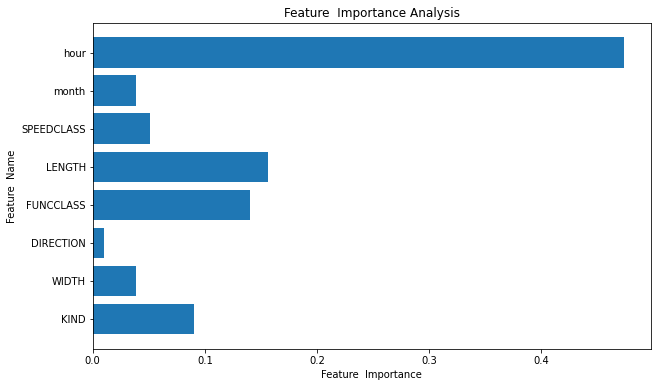

In [25]:
y_test = y_test[:10000]
y_pred = y_pred[:10000]
plt.figure(figsize=(10,  6))
plt.scatter(y_test,  y_pred, alpha=0.5)
plt.plot([y_test.min(),  y_test.max()],  [y_test.min(),  y_test.max()],  'r--', lw=2)
plt.xlabel('True  Values')
plt.ylabel('Predictions')
plt.title('True  vs Predicted Values')
plt.show()

# 6.2 特征重要性分析
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,  6))
plt.barh(feature_names,  importances)
plt.xlabel('Feature  Importance')
plt.ylabel('Feature  Name')
plt.title('Feature  Importance Analysis')
plt.show()

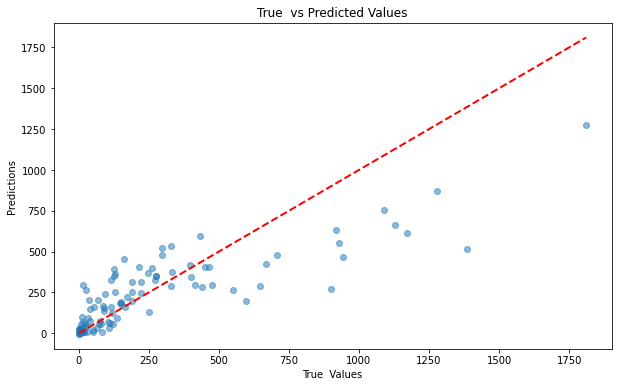

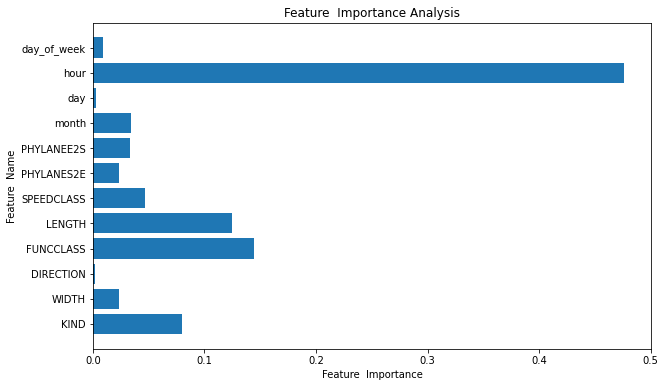

In [19]:
# 6. 可视化分析
# 6.1 真实值与预测值对比图
y_test = y_test[:20000]
y_pred = y_pred[:20000]
plt.figure(figsize=(10,  6))
plt.scatter(y_test,  y_pred, alpha=0.5)
plt.plot([y_test.min(),  y_test.max()],  [y_test.min(),  y_test.max()],  'r--', lw=2)
plt.xlabel('True  Values')
plt.ylabel('Predictions')
plt.title('True  vs Predicted Values')
plt.show()

# 6.2 特征重要性分析
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,  6))
plt.barh(feature_names,  importances)
plt.xlabel('Feature  Importance')
plt.ylabel('Feature  Name')
plt.title('Feature  Importance Analysis')
plt.show()